In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

In [2]:
# low, upper
# plt.axvline(x=low, color='r', linewidth=2);

# Simulating From the Null Hypothesis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

1. If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the first quiz question below.

2. If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be? Write them in the cell below, and use your answer to answer the second quiz question below.



average height for coffee drinkers is the same as for non-coffee drinkers

    H0 : height(coffee) = height(no coffee)
    H1 : height(coffee) <> height(no coffee)
    
average height for coffee drinkers is less than non-coffee drinkers

    H0 : height(coffee) >= height(no coffee)
    H1 : height(coffee) < height(no coffee)


3. For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample. You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means. Use the results of your sampling distribution, to answer the third quiz question below.


np.mean(drink_means) : 68.1170203438573
np.mean(no_drink_means) : 66.7802393564418
np.mean(boot_diffs) : 1.3367809874155205
np.std(drink_means) : 0.24199030603946156
np.std(no_drink_means) : 0.40740156905046576
np.std(boot_diffs) : 0.47461751257882373


(array([   3.,   76.,  420., 1408., 2764., 2909., 1718.,  602.,   92.,
           8.]),
 array([67.14733174, 67.33718939, 67.52704705, 67.71690471, 67.90676237,
        68.09662002, 68.28647768, 68.47633534, 68.666193  , 68.85605065,
        69.04590831]),
 <a list of 10 Patch objects>)

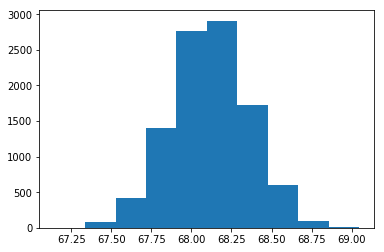

(array([  16.,  154.,  649., 1747., 2760., 2647., 1453.,  450.,  110.,
          14.]),
 array([65.31124228, 65.61188904, 65.9125358 , 66.21318257, 66.51382933,
        66.81447609, 67.11512285, 67.41576961, 67.71641638, 68.01706314,
        68.3177099 ]),
 <a list of 10 Patch objects>)

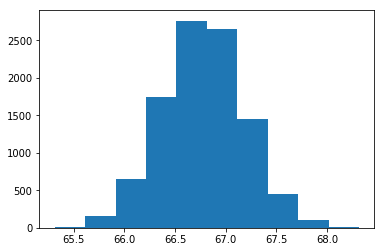

(array([  21.,  124.,  595., 1645., 2667., 2709., 1544.,  555.,  123.,
          17.]),
 array([-0.38962334, -0.04257622,  0.3044709 ,  0.65151802,  0.99856513,
         1.34561225,  1.69265937,  2.03970649,  2.3867536 ,  2.73380072,
         3.08084784]),
 <a list of 10 Patch objects>)

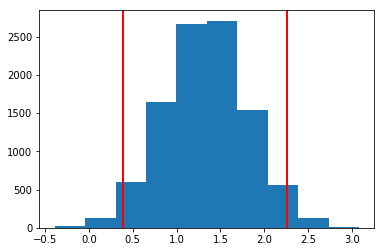

lower, upper : (0.3933301883768994, 2.2627035091189343)
upper-lower : 1.8693733207420349


In [16]:
# pv("sample_data.mean()")
# pv("sample_data.std()")
# pv("sample_data.var()")

boot_diffs = []
drink_means = []
no_drink_means = []
for _ in range(10_000):
    nb_sample = 200
    boot_sample = sample_data.sample(nb_sample, replace=True)
    
    drink_mean = boot_sample.query("drinks_coffee == True")['height'].mean()
    drink_means.append(drink_mean)
    no_drink_mean = boot_sample.query("drinks_coffee == False")['height'].mean()
    no_drink_means.append(no_drink_mean)
    
    boot_diffs.append(drink_mean - no_drink_mean)

# pv("len(drink_means)")
# pv("len(no_drink_means)")
# pv("len(boot_diffs)")


pv("np.mean(drink_means)")
pv("np.mean(no_drink_means)")
pv("np.mean(boot_diffs)")

pv("np.std(drink_means)")
pv("np.std(no_drink_means)")
pv("np.std(boot_diffs)")

plt.hist(drink_means)
plt.show()

plt.hist(no_drink_means)
plt.show()

lower, upper = np.percentile(boot_diffs, 2.5), np.percentile(boot_diffs, 97.5) # np.percentile(mb, [2.5, 97.5])
plt.hist(boot_diffs);
plt.axvline(x=lower, color='r', linewidth=2);
plt.axvline(x=upper, color='r', linewidth=2);
plt.show()

pv("lower, upper")
pv("upper-lower")
    

## 26 - Drawing Conclusions - Calculating Errors

Here are two datasets that represent two of the examples you have seen in this lesson.  

One dataset is based on the parachute example, and the second is based on the judicial example.  Neither of these datasets is based on real people.

Use the exercises below to assist in answering the quiz questions at the bottom of this page.

In [66]:
import numpy as np
import pandas as pd

jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')





`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.  

**Hint for quiz:** an error is any time the prediction doesn't match an actual value.  Additionally, there are Type I and Type II errors to think about.  We also know we can minimize one type of error by maximizing the other type of error.  If we predict all individuals as innocent, how many of the guilty are incorrectly labeled?  Similarly, if we predict all individuals as guilty, how many of the innocent are incorrectly labeled?

Total percentage of errors

Percentage of Type I Errors

Percentage of Type II Errors

If everyone was predicted to be guilty, the proportion of Type I Errors made.

If everyone was predicted to be guilty, the proportion of Type II Errors made.


In [67]:
jud_data.head()
nb_cases = jud_data.shape[0]
errors = jud_data.query("actual != predicted")
nb_errors = errors.shape[0]
pv("nb_errors/nb_cases")
errors_type_1 = jud_data.query("actual == 'innocent' and predicted == 'guilty'")
pv("errors_type_1.shape[0]/nb_cases")
errors_type_2 = jud_data.query("actual == 'guilty' and predicted == 'innocent'")
pv("errors_type_2.shape[0]/nb_cases")

errors_type_1 = jud_data.query("actual == 'innocent'")
pv("errors_type_1.shape[0]/nb_cases")
errors_type_2 = 0 # because no one is innocent !

,defendant_id,actual,predicted
0,22574,innocent,innocent
1,35637,innocent,innocent
2,39919,innocent,innocent
3,29610,guilty,guilty
4,38273,innocent,innocent


nb_errors/nb_cases : 0.042152958945489497
errors_type_1.shape[0]/nb_cases : 0.001510366607167376
errors_type_2.shape[0]/nb_cases : 0.04064259233832212
errors_type_1.shape[0]/nb_cases : 0.45159961554304545


`2.` Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

These should be very similar operations to those you performed in the previous question.
Total percentage of errors

Percentage of Type I Errors

Percentage of Type II Errors

If every parachute was predicted to not open, the proportion of Type I Errors made.

If every parachute was predicted to not open, the proportion of Type II Errors made.


In [68]:
par_data.actual.unique()

nb_cases = par_data.shape[0]
errors = par_data.query("actual != predicted")
nb_errors = errors.shape[0]
pv("nb_errors/nb_cases")
errors_type_1 = par_data.query("actual == 'fails' and predicted == 'opens'")
pv("errors_type_1.shape[0]/nb_cases")
errors_type_2 = par_data.query("actual == 'opens' and predicted == 'fails'")
pv("errors_type_2.shape[0]/nb_cases")

errors_type_2 = par_data.query("actual == 'opens'")
pv("errors_type_2.shape[0]/nb_cases")

array(['opens', 'fails'], dtype=object)

nb_errors/nb_cases : 0.039972551037913875
errors_type_1.shape[0]/nb_cases : 0.00017155601303825698
errors_type_2.shape[0]/nb_cases : 0.03980099502487562
errors_type_2.shape[0]/nb_cases : 0.9917653113741637


### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 


$$H_0: \mu = 67.60$$

$$H_1: \mu \neq 67.60$$

In [6]:


full_data = pd.read_csv('coffee_dataset.csv')

full_data.head(2)

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249


`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 

Use **quiz 2** below to assure your answers are correct.  

### Simulating from the null
1. Assume the null is true, we know what the sampling distribuntion would look like if we simulate from the closest value under the null to the alternative (67.60 ?)
2. We simulate a normal distribution to get the standard deviation of the sampling distribution (for loop, df.sample(replace=True), append)
3. We know it must follow a central distribution if the null is true (central limit theorem)
4. We use NumPy to simulate draws from the normal using the hypothesized mean and the standard deviation of the sampling  distribution : np.random.normal(loc=null_hypothesis, scale=np.std(means_sampling_distribution), size = number of sample range)
5. Each of the simulated draws represents a possible mean from the null hypothesis
6. Where the sample mean falls in this distribution ? Below or above the null ?

#### Calculate Confidence Interval
Determine a confidence interval and degrees of freedom
This is what we call alpha (α). The typical value of α is 0.05. This means that there is 95% confidence that the conclusion of this test will be valid. The degree of freedom can be calculated by the the following formula:
alpha = 0.05
degree_freedom = 1-alpha

ordered = sort(statistics)
lower = percentile(ordered, alpha/2)
upper = percentile(ordered, (1-alpha) + alpha/2))

=> Lower et upper sont les p-value ?

np.mean(full_data.height) : 67.59748697307937
np.std(full_data.height) : 3.1189087116821472


,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


(5, 4)

np.mean(sample1.height) : 67.88234252049084


(array([   9.,   65.,  346., 1016., 2096., 2852., 2257., 1067.,  260.,
          32.]),
 array([62.0966947 , 63.10054507, 64.10439543, 65.1082458 , 66.11209617,
        67.11594654, 68.1197969 , 69.12364727, 70.12749764, 71.131348  ,
        72.13519837]),
 <a list of 10 Patch objects>)

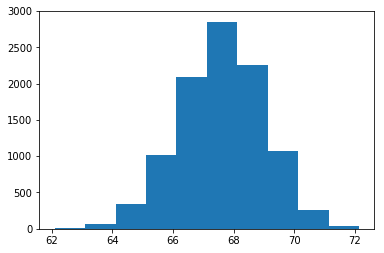

np.mean(means) : 67.59984472303822
np.std(means) : 1.3873129885457822


In [55]:
np.random.seed(42)
pv("np.mean(full_data.height)")
pv("np.std(full_data.height)")
nb_sample = 5
sample1 = full_data.sample(nb_sample)
sample1
sample1.shape
pv("np.mean(sample1.height)")
null_hypothesis = 67.60
sampling_times = 10_000
means = []
for _ in range(sampling_times):
    boot_sample = full_data.sample(nb_sample)
    means.append(boot_sample.height.mean())
plt.hist(means);
plt.show();
pv("np.mean(means)")
pv("np.std(means)")


`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

alpha/2  * 100 : 2.5
((1-alpha) + alpha/2)  * 100 : 97.5
lower, upper : (64.93167771424777, 70.3297488018013)
np.mean(means)-np.mean(null_hypothesis_values) : -0.025500615201551113


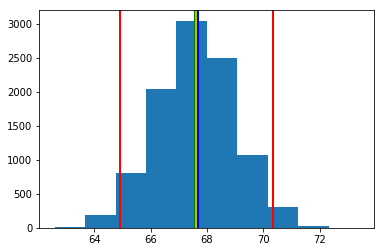

95.0% confident that the value is between 64.9 and 70.3
pval : 1.0081
p-value= 0.6226


In [49]:

null_hypothesis_values = np.random.normal(loc=null_hypothesis, scale=np.std(means), size=sampling_times)


alpha = 0.05
pv("alpha/2  * 100")
pv("((1-alpha) + alpha/2)  * 100")
lower = np.percentile(null_hypothesis_values, alpha/2  * 100)
upper = np.percentile(null_hypothesis_values, ((1-alpha) + alpha/2)  * 100) # np.percentile(mb, [2.5, 97.5])


pv("lower, upper")
pv("np.mean(means)-np.mean(null_hypothesis_values)")

_ = plt.hist(null_hypothesis_values);
plt.axvline(x=lower, color='r', linewidth=2);
plt.axvline(x=upper, color='r', linewidth=2);
plt.axvline(x=sample1.height.mean(), color='b', linewidth=2);
plt.axvline(x=null_hypothesis, color='r', linewidth=2);
plt.axvline(x=np.mean(means), color='g', linewidth=2);
plt.axvline(x=np.mean(null_hypothesis_values), color='y', linewidth=2);
plt.show();

print('%.1f%% confident that the value is between %.1f and %.1f' % ((1-alpha)*100, lower, upper))

# p-value
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
prob_more_extreme_high = (null_hypothesis_values > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_hypothesis - (obs_mean - null_hypothesis) < null_hypothesis_values).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pv("pval")

# this is another way to compute the standard deviation of the sampling distribution theoretically  
std_sampling_dist = full_data.height.std()/np.sqrt(nb_sample)  
null_sims = np.random.normal(null_hypothesis, std_sampling_dist, sampling_times)  
low_ext = (null_hypothesis - (sample1.height.mean() - null_hypothesis))  
high_ext = sample1.height.mean()  
print("p-value=",(null_sims > high_ext).mean() + (null_sims < low_ext).mean())



`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.



np.mean(full_data.height) : 67.59748697307937
np.std(full_data.height) : 3.1189087116821472
np.mean(sample1.height) : 67.687610765017


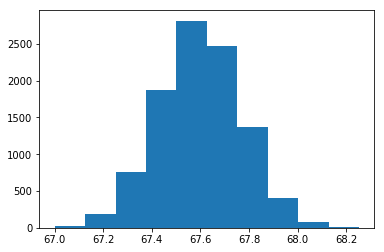

np.mean(means) : 67.5988283911597
np.std(means) : 0.17076382206590648


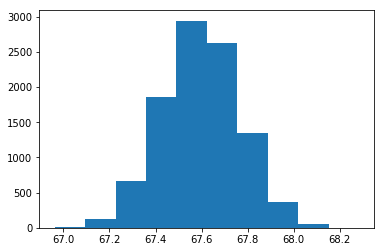

In [61]:
np.random.seed(42)
pv("np.mean(full_data.height)")
pv("np.std(full_data.height)")
nb_sample = 300
sample1 = full_data.sample(nb_sample)
pv("np.mean(sample1.height)")
null_hypothesis = 67.60
sampling_times = 10_000

means = []
for _ in range(sampling_times):
    boot_sample = full_data.sample(nb_sample) # Why not with replace=True ?
    means.append(boot_sample.height.mean())
plt.hist(means);
plt.show();
pv("np.mean(means)")
pv("np.std(means)")


null_hypothesis_values = np.random.normal(loc=null_hypothesis, scale=np.std(means), size=sampling_times)

plt.hist(null_hypothesis_values);
plt.show();

alpha/2  * 100 : 2.5
((1-alpha) + alpha/2)  * 100 : 97.5
lower, upper : (67.25222466486355, 67.95660471529004)
np.mean(means)-np.mean(null_hypothesis_values) : -0.005220997801814065


(array([  15.,   98.,  575., 1562., 2654., 2687., 1681.,  586.,  125.,
          17.]),
 array([66.92853397, 67.06220868, 67.19588338, 67.32955809, 67.46323279,
        67.5969075 , 67.73058221, 67.86425691, 67.99793162, 68.13160632,
        68.26528103]),
 <a list of 10 Patch objects>)

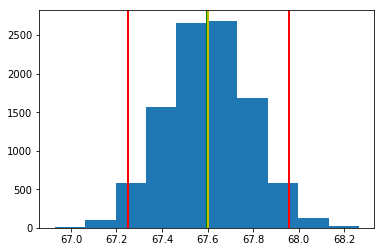

95.0% confident that the value is between 67.3 and 68.0
p-value= 0.6278
p-value= 0.6276


In [58]:

alpha = 0.05
pv("alpha/2  * 100")
pv("((1-alpha) + alpha/2)  * 100")
lower = np.percentile(null_hypothesis_values, alpha/2  * 100)
upper = np.percentile(null_hypothesis_values, ((1-alpha) + alpha/2)  * 100) # np.percentile(mb, [2.5, 97.5])


pv("lower, upper")
pv("np.mean(means)-np.mean(null_hypothesis_values)")

plt.hist(null_hypothesis_values);
plt.axvline(x=lower, color='r', linewidth=2);
plt.axvline(x=upper, color='r', linewidth=2);

plt.axvline(x=null_hypothesis, color='r', linewidth=2);
plt.axvline(x=np.mean(means), color='g', linewidth=2);
plt.axvline(x=np.mean(null_hypothesis_values), color='y', linewidth=2);
plt.show();

print('%.1f%% confident that the value is between %.1f and %.1f' % ((1-alpha)*100, lower, upper))

# p-value
low_ext = (null_hypothesis - (sample1.height.mean() - null_hypothesis))  
high_ext = sample1.height.mean()
print("p-value=",(null_hypothesis_values > high_ext).mean() + (null_hypothesis_values < low_ext).mean())

# this is another way to compute the standard deviation of the sampling distribution theoretically  
std_sampling_dist = full_data.height.std()/np.sqrt(nb_sample)  
null_sims = np.random.normal(null_hypothesis, std_sampling_dist, sampling_times)  
low_ext = (null_hypothesis - (sample1.height.mean() - null_hypothesis))  
high_ext = sample1.height.mean()  
print("p-value=",(null_sims > high_ext).mean() + (null_sims < low_ext).mean())

# Multiple Tests
In this notebook, you will work with a similar dataset to the judicial dataset you were working with before.  However, instead of working with decisions already being provided, you are provided with a p-value associated with each individual.  

Use the questions in the notebook and the dataset to answer the questions at the bottom of this page.

Here is a glimpse of the data you will be working with:

In [64]:
import numpy as np
import pandas as pd

df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

,defendant_id,actual,pvalue
0,22574,innocent,0.294126
1,35637,innocent,0.417981
2,39919,innocent,0.177542
3,29610,guilty,0.015023
4,38273,innocent,0.075371


`1.` Remember back to the null and alternative hypotheses for this example. Use that information to determine the answer for **Quiz 1** and **Quiz 2** below.
`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected alpha level we should use to maintain a 5% type I error rate.

`3.` What is the proportion of type I errors made if the correction isn't used?  How about if it is used?  

Use your answers to find the solution to **Quiz 3** below.

In [71]:
alpha = 0.05
nb_test=jud_data.shape[0]
Bonferroni = alpha / nb_test
pv('Bonferroni')

# p-value : The probability of us observing the facts about an individual's case that are in favor of them being guilty, assuming they are truly innocent.
# In order to find the number of type I errors made without the correction - we need to find all those that are actually innocent with p-values less than 0.05.
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used
df.query("actual == 'innocent' and pvalue < @Bonferroni").count()[0]/df.shape[0] # If used

Bonferroni : 6.86530275985171e-06


0.001510366607167376

0.0

`4.` Think about how hypothesis tests can be used, and why this example wouldn't exactly work in terms of being able to use hypothesis testing in this way.  Check your answer with **Quiz 4** below.

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain p-values for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**